In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as sm


# Read data

In [2]:
#read the data
data=pd.read_csv('universities_cleaned.csv')
data

,Unnamed: 0,School_x,business_school,Acceptance Rate,Average Salary,Public(0) or Private(1),Reputation Score,Alumni,Tuition_Fees_17&18,Distance to Nearest City (Miles),Distance Far vs. Close
0,0,University of Pennsylvania (Wharton),Wharton,0.0649,80354,1,4.8,99000.0,53534.0,1.560704,Close
1,1,Washington University in St. Louis (Olin),Olin,0.0970,67115,1,4.1,21000.0,51533.0,235.684726,Far
2,2,University of California-Berkeley (Haas),Haas,0.0430,73302,0,4.6,39000.0,42184.0,11.315188,Close
3,3,Cornell University (Dyson),Dyson,0.0290,74493,1,4.3,NaN,52853.0,178.500330,Far
4,4,University of Michigan (Ross),Ross,0.1200,72268,0,4.6,52000.0,32451.5,35.657174,Close
...,...,...,...,...,...,...,...,...,...,...,...
83,83,University of South Carolina (Darla Moore),Darla Moore,0.6510,61946,0,3.6,48000.0,23155.0,36.649280,Close
84,84,University of Delaware (Lerner),Lerner,0.4640,54087,0,NaN,34400.0,18146.5,335.203680,Far
85,85,University of Missouri-Columbia (Trulaske),Trulaske,0.6917,48827,0,3.2,32000.0,42166.0,232.209889,Far
86,86,St. Louis University (Chaifetz),Chaifetz,0.8303,63333,1,NaN,25625.0,39820.0,53.214610,Far


# Explore variable

<AxesSubplot:xlabel='Alumni', ylabel='Count'>

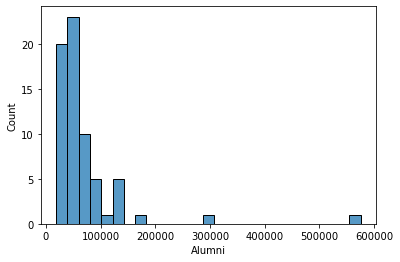

In [3]:
#distribution of alumni size
sns.histplot(data.Alumni)

- we have high outliers

In [4]:
#number of universities with no value
data.Alumni.isna().sum()

21

<AxesSubplot:xlabel='Average Salary', ylabel='Alumni'>

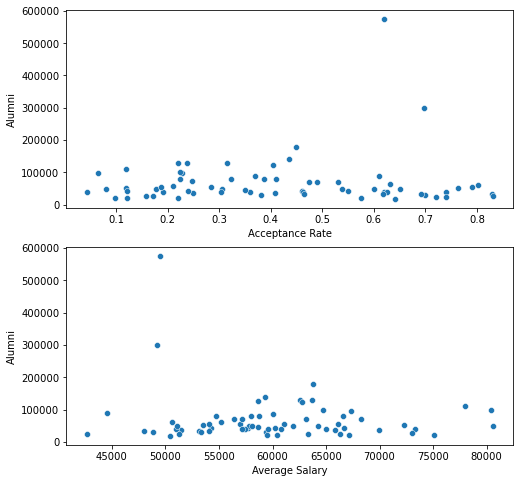

In [5]:
fig, ax= plt.subplots(2,1, figsize=(8,8))

sns.scatterplot(x=data['Acceptance Rate'], y=data['Alumni'], ax=ax[0])
sns.scatterplot(x=data['Average Salary'], y=data['Alumni'], ax=ax[1])

- doesn't seem to be a relationship between alumni size and acceptance rate or average salary

# Cleaning data

## Dropping outliers

In [6]:
data.sort_values(by='Alumni', ascending=False).head()

,Unnamed: 0,School_x,business_school,Acceptance Rate,Average Salary,Public(0) or Private(1),Reputation Score,Alumni,Tuition_Fees_17&18,Distance to Nearest City (Miles),Distance Far vs. Close
77,77,University of Michigan-Dearborn,Michigan-Dearborn,0.6200,49507,0,NaN,575000.0,18754.0,9.594292,Close
39,39,University of Kentucky (Gatton),Gatton,0.6979,49175,0,3.3,300000.0,19994.0,69.752142,Far
26,26,Fordham University (Gabelli),Gabelli,0.4490,63777,1,3.3,180000.0,50601.0,12.157420,Close
43,43,Santa Clara University (Leavey),Leavey,0.4350,59333,1,3.3,140000.0,49858.0,2.945132,Close
59,59,Villanova University,Villanova,0.2207,63709,1,3.4,130000.0,51284.0,11.107455,Close


In [7]:
#drop outliers
d=data.drop([77, 39])

<AxesSubplot:xlabel='Average Salary', ylabel='Alumni'>

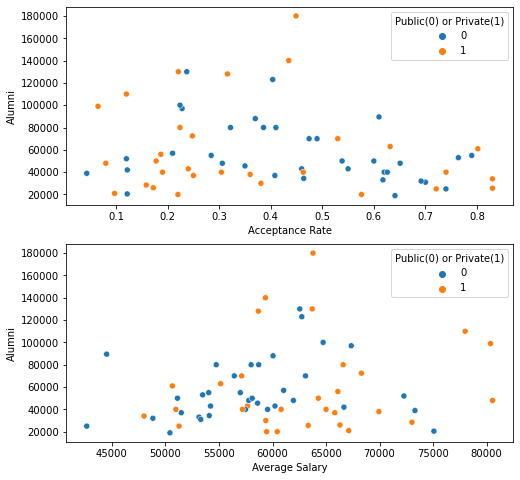

In [8]:
fig, ax= plt.subplots(2,1, figsize=(8,8))

sns.scatterplot(x=d['Acceptance Rate'], y=d['Alumni'], hue=d['Public(0) or Private(1)'], ax=ax[0])
sns.scatterplot(x=d['Average Salary'], y=d['Alumni'], hue=d['Public(0) or Private(1)'], ax=ax[1])

- doesn't seem to be a pattern between alumni size or type of school (public/private)

## Dealing with missing data

### Fill in with zeros

In [9]:
#replace empty results for Alumni with zero
d['Alumni']=d['Alumni'].fillna(0)
d.head()

,Unnamed: 0,School_x,business_school,Acceptance Rate,Average Salary,Public(0) or Private(1),Reputation Score,Alumni,Tuition_Fees_17&18,Distance to Nearest City (Miles),Distance Far vs. Close
0,0,University of Pennsylvania (Wharton),Wharton,0.0649,80354,1,4.8,99000.0,53534.0,1.560704,Close
1,1,Washington University in St. Louis (Olin),Olin,0.0970,67115,1,4.1,21000.0,51533.0,235.684726,Far
2,2,University of California-Berkeley (Haas),Haas,0.0430,73302,0,4.6,39000.0,42184.0,11.315188,Close
3,3,Cornell University (Dyson),Dyson,0.0290,74493,1,4.3,0.0,52853.0,178.500330,Far
4,4,University of Michigan (Ross),Ross,0.1200,72268,0,4.6,52000.0,32451.5,35.657174,Close


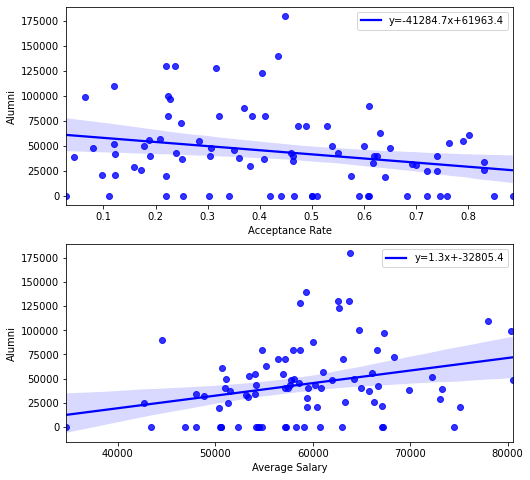

In [10]:
fig, ax= plt.subplots(2,1, figsize=(8,8))

# get coeffs of linear fit
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(d['Acceptance Rate'],d['Alumni'])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(d['Average Salary'],d['Alumni'])


# use line_kws to set line label for legend
ax1 = sns.regplot(x="Acceptance Rate", y="Alumni", data=d, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope1,intercept1)}, ax=ax[0])

ax2 = sns.regplot(x="Average Salary", y="Alumni", data=d, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope2,intercept2)}, ax=ax[1])

# plot legend
ax1.legend()
ax2.legend()

plt.show()

### Drop universities with no alumni size value

In [11]:
#drop universities with empty alumni size
data = pd.read_csv('universities_cleaned.csv')
dd = data.drop([77, 39])
dd = dd[dd['Alumni'].notna()]
dd.head()

,Unnamed: 0,School_x,business_school,Acceptance Rate,Average Salary,Public(0) or Private(1),Reputation Score,Alumni,Tuition_Fees_17&18,Distance to Nearest City (Miles),Distance Far vs. Close
0,0,University of Pennsylvania (Wharton),Wharton,0.0649,80354,1,4.8,99000.0,53534.0,1.560704,Close
1,1,Washington University in St. Louis (Olin),Olin,0.0970,67115,1,4.1,21000.0,51533.0,235.684726,Far
2,2,University of California-Berkeley (Haas),Haas,0.0430,73302,0,4.6,39000.0,42184.0,11.315188,Close
4,4,University of Michigan (Ross),Ross,0.1200,72268,0,4.6,52000.0,32451.5,35.657174,Close
5,5,New York University (Stern),Stern,0.0800,80546,1,4.4,48000.0,50464.0,1.326962,Close


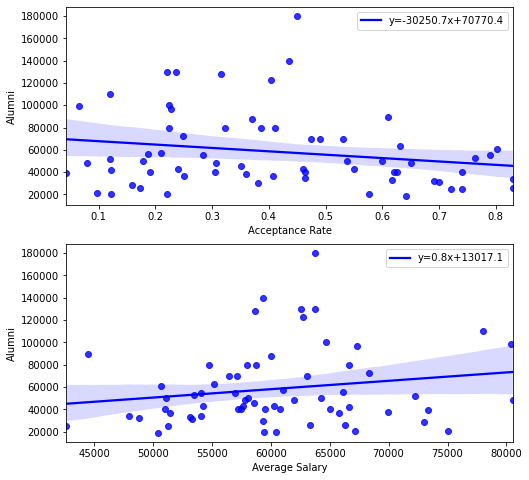

In [12]:
fig, ax= plt.subplots(2,1, figsize=(8,8))

# get coeffs of linear fit
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(dd['Acceptance Rate'],dd['Alumni'])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(dd['Average Salary'],dd['Alumni'])


# use line_kws to set line label for legend
ax1 = sns.regplot(x="Acceptance Rate", y="Alumni", data=dd, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope1,intercept1)}, ax=ax[0])

ax2 = sns.regplot(x="Average Salary", y="Alumni", data=dd, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope2,intercept2)}, ax=ax[1])

# plot legend
ax1.legend()
ax2.legend()

plt.show()

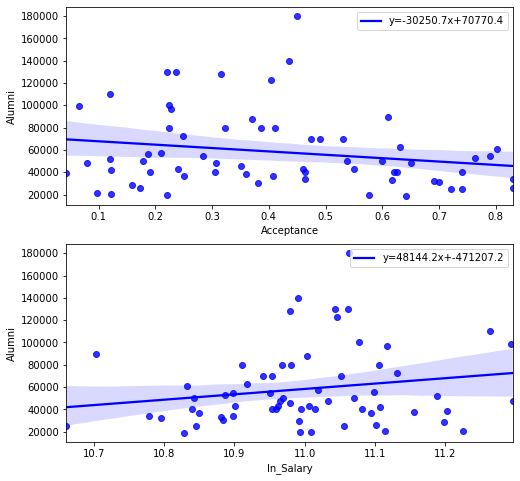

In [20]:
fig, ax= plt.subplots(2,1, figsize=(8,8))

# get coeffs of linear fit
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(dd['Acceptance'],dd['Alumni'])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(dd['ln_Salary'],dd['Alumni'])


# use line_kws to set line label for legend
ax1 = sns.regplot(x="Acceptance", y="Alumni", data=dd, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope1,intercept1)}, ax=ax[0])

ax2 = sns.regplot(x="ln_Salary", y="Alumni", data=dd, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope2,intercept2)}, ax=ax[1])

# plot legend
ax1.legend()
ax2.legend()

plt.show()

# Regression

In [18]:
data=data.rename(columns={
    'Average Salary':'Salary','Acceptance Rate':'Acceptance',  'Public(0) or Private(1)':'Private',
    'Reputation Score':'Reputation','Tuition_Fees_17&18':'Tuition','Distance to Nearest City (Miles)':'Distance'})
d=d.rename(columns={
    'Average Salary':'Salary','Acceptance Rate':'Acceptance',  'Public(0) or Private(1)':'Private',
    'Reputation Score':'Reputation','Tuition_Fees_17&18':'Tuition','Distance to Nearest City (Miles)':'Distance'})
dd=dd.rename(columns={
    'Average Salary':'Salary','Acceptance Rate':'Acceptance',  'Public(0) or Private(1)':'Private',
    'Reputation Score':'Reputation','Tuition_Fees_17&18':'Tuition','Distance to Nearest City (Miles)':'Distance'})

In [30]:
data["ln_Salary"] = np.log(data["Salary"])
d["ln_Salary"] = np.log(d["Salary"])
dd["ln_Salary"] = np.log(dd["Salary"])

data["ln_Alumni"] = np.log(data["Alumni"])
d["ln_Alumni"] = np.log(d["Alumni"]+1)
dd["ln_Alumni"] = np.log(dd["Alumni"])

## Relationship between average log salary and acceptance rate

In [21]:
result = sm.ols(formula="ln_Salary ~ Acceptance", 
                data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_Salary   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     87.33
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           9.76e-15
Time:                        14:27:03   Log-Likelihood:                 75.489
No. Observations:                  88   AIC:                            -147.0
Df Residuals:                      86   BIC:                            -142.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1727      0.024    464.995      0.0

## Relationship between log average salary and alumni size 

In [22]:
result = sm.ols(formula="ln_Salary ~  Alumni", 
                data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_Salary   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.085
Date:                Tue, 30 Nov 2021   Prob (F-statistic):              0.301
Time:                        14:27:05   Log-Likelihood:                 40.378
No. Observations:                  67   AIC:                            -76.76
Df Residuals:                      65   BIC:                            -72.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0101      0.022    495.195      0.0

In [23]:
#(empty alumni size replaced with zero)
result = sm.ols(formula="ln_Salary ~  Alumni", 
                data=d).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_Salary   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     7.886
Date:                Tue, 30 Nov 2021   Prob (F-statistic):            0.00619
Time:                        14:27:06   Log-Likelihood:                 47.840
No. Observations:                  86   AIC:                            -91.68
Df Residuals:                      84   BIC:                            -86.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9288      0.023    476.090      0.0

In [24]:
#(universities with empty alumni size dropped)
result = sm.ols(formula="ln_Salary ~  Alumni", 
                data=dd).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_Salary   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.271
Date:                Tue, 30 Nov 2021   Prob (F-statistic):              0.137
Time:                        14:27:07   Log-Likelihood:                 40.847
No. Observations:                  65   AIC:                            -77.69
Df Residuals:                      63   BIC:                            -73.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9581      0.032    338.412      0.0

In [25]:
result.params

Intercept    1.095813e+01
Alumni       7.225503e-07
dtype: float64

In [26]:
np.exp(result.params[0])

57419.07330002995

## Relationship between log average salary and log alumni size 


In [27]:
result = sm.ols(formula="ln_Salary ~  ln_Alumni", 
                data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_Salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                 1.138e-07
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               1.00
Time:                        14:27:59   Log-Likelihood:                 39.823
No. Observations:                  67   AIC:                            -75.65
Df Residuals:                      65   BIC:                            -71.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9944      0.282     38.925      0.0

In [31]:
#(empty alumni size replaced with zero)
#alumni size was increased by 1 before taking the log
result = sm.ols(formula="ln_Salary ~  ln_Alumni", 
                data=d).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_Salary   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7.812
Date:                Tue, 30 Nov 2021   Prob (F-statistic):            0.00643
Time:                        14:29:08   Log-Likelihood:                 47.805
No. Observations:                  86   AIC:                            -91.61
Df Residuals:                      84   BIC:                            -86.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9032      0.031    357.134      0.0

In [32]:
#(universities with empty alumni size dropped)
result = sm.ols(formula="ln_Salary ~  ln_Alumni", 
                data=dd).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_Salary   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.950
Date:                Tue, 30 Nov 2021   Prob (F-statistic):              0.167
Time:                        14:29:11   Log-Likelihood:                 40.687
No. Observations:                  65   AIC:                            -77.37
Df Residuals:                      63   BIC:                            -73.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5393      0.331     31.884      0.0

## Relationship between acceptance rate and alumni size 

In [33]:
result = sm.ols(formula="Acceptance ~  Alumni", 
                data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Acceptance   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.2985
Date:                Tue, 30 Nov 2021   Prob (F-statistic):              0.587
Time:                        14:29:56   Log-Likelihood:                 5.9073
No. Observations:                  67   AIC:                            -7.815
Df Residuals:                      65   BIC:                            -3.405
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4029      0.037     10.832      0.0

In [34]:
#(empty alumni size replaced with zero)
result = sm.ols(formula="Acceptance ~  Alumni", 
                data=d).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Acceptance   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     5.214
Date:                Tue, 30 Nov 2021   Prob (F-statistic):             0.0249
Time:                        14:29:58   Log-Likelihood:                 8.2009
No. Observations:                  86   AIC:                            -12.40
Df Residuals:                      84   BIC:                            -7.493
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4943      0.036     13.581      0.0

In [35]:
#(universities with empty alumni size dropped)
result = sm.ols(formula="Acceptance ~  Alumni", 
                data=dd).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Acceptance   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.551
Date:                Tue, 30 Nov 2021   Prob (F-statistic):              0.115
Time:                        14:29:59   Log-Likelihood:                 7.1323
No. Observations:                  65   AIC:                            -10.26
Df Residuals:                      63   BIC:                            -5.916
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4842      0.054      8.902      0.0

In [36]:
result.params

Intercept    0.484227
Alumni      -0.000001
dtype: float64

In [37]:
np.exp(result.params[0]-1)

0.5970388405835941

## Relationship between acceptance rate and log alumni size 

In [38]:
result = sm.ols(formula="Acceptance ~  ln_Alumni", 
                data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Acceptance   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.1792
Date:                Tue, 30 Nov 2021   Prob (F-statistic):              0.673
Time:                        14:30:51   Log-Likelihood:                 5.8460
No. Observations:                  67   AIC:                            -7.692
Df Residuals:                      65   BIC:                            -3.283
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6147      0.469      1.311      0.1

In [39]:
#(empty alumni size replaced with zero)
#alumni size was increased by 1 before taking the log
result = sm.ols(formula="Acceptance ~  ln_Alumni", 
                data=d).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Acceptance   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     3.213
Date:                Tue, 30 Nov 2021   Prob (F-statistic):             0.0767
Time:                        14:30:51   Log-Likelihood:                 7.2252
No. Observations:                  86   AIC:                            -10.45
Df Residuals:                      84   BIC:                            -5.542
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5080      0.049     10.380      0.0

In [40]:
#(universities with empty alumni size dropped)
result = sm.ols(formula="Acceptance ~  ln_Alumni", 
                data=dd).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Acceptance   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.481
Date:                Tue, 30 Nov 2021   Prob (F-statistic):              0.120
Time:                        14:30:52   Log-Likelihood:                 7.0975
No. Observations:                  65   AIC:                            -10.19
Df Residuals:                      63   BIC:                            -5.846
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2810      0.554      2.311      0.0

## Relationship between log average salary and acceptance rate controlling alumni size 


In [41]:
result = sm.ols(formula="ln_Salary ~ Acceptance + Alumni", 
                data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_Salary   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     50.40
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           7.15e-14
Time:                        14:31:31   Log-Likelihood:                 71.511
No. Observations:                  67   AIC:                            -137.0
Df Residuals:                      64   BIC:                            -130.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1975      0.024    474.872      0.0

In [42]:
#(empty alumni size replaced with zero)
result = sm.ols(formula="ln_Salary ~ Acceptance + Alumni", 
                data=d).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_Salary   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     43.11
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           1.45e-13
Time:                        14:31:52   Log-Likelihood:                 74.613
No. Observations:                  86   AIC:                            -143.2
Df Residuals:                      83   BIC:                            -135.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1411      0.030    368.433      0.0

In [43]:
#(universities with empty alumni size dropped)
result = sm.ols(formula="ln_Salary ~ Acceptance + Alumni", 
                data=dd).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_Salary   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     45.09
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           8.16e-13
Time:                        14:31:56   Log-Likelihood:                 68.878
No. Observations:                  65   AIC:                            -131.8
Df Residuals:                      62   BIC:                            -125.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1773      0.032    350.755      0.0

## Relationship between log average salary and acceptance rate controlling log alumni size 

In [44]:
result = sm.ols(formula="ln_Salary ~ Acceptance + ln_Alumni", 
                data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_Salary   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     49.55
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           9.97e-14
Time:                        14:32:41   Log-Likelihood:                 71.163
No. Observations:                  67   AIC:                            -136.3
Df Residuals:                      64   BIC:                            -129.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2830      0.181     62.458      0.0

In [45]:
#(empty alumni size replaced with zero)
#alumni size was increased by 1 before taking the log
result = sm.ols(formula="ln_Salary ~ Acceptance + ln_Alumni", 
                data=dd).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_Salary   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     44.96
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           8.59e-13
Time:                        14:33:02   Log-Likelihood:                 68.823
No. Observations:                  65   AIC:                            -131.6
Df Residuals:                      62   BIC:                            -125.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1208      0.225     49.402      0.0

In [46]:
#(universities with empty alumni size dropped)
result = sm.ols(formula="ln_Salary ~ Acceptance + ln_Alumni", 
                data=dd).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_Salary   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     44.96
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           8.59e-13
Time:                        14:33:04   Log-Likelihood:                 68.823
No. Observations:                  65   AIC:                            -131.6
Df Residuals:                      62   BIC:                            -125.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1208      0.225     49.402      0.0

## Relationship between log average salary and acceptance rate controlling all variables 

In [47]:
data.columns

Index(['Unnamed: 0', 'School_x', 'business_school', 'Acceptance', 'Salary',
       'Private', 'Reputation', 'Alumni', 'Tuition', 'Distance',
       'Distance Far vs. Close', 'ln_Salary', 'ln_Alumni'],
      dtype='object')

In [48]:
result = sm.ols(formula="ln_Salary ~ Acceptance + Private + Reputation + Alumni + Tuition + Distance + Tuition*Private", 
                data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_Salary   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     16.43
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           9.66e-10
Time:                        14:33:28   Log-Likelihood:                 66.342
No. Observations:                  46   AIC:                            -116.7
Df Residuals:                      38   BIC:                            -102.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.8177      0.147     

In [49]:
#(empty alumni size replaced with zero)
result = sm.ols(formula="Salary ~ Acceptance + Private + Reputation + Alumni + Tuition + Distance + Tuition*Private", 
                data=d).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     16.87
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           1.06e-10
Time:                        14:33:30   Log-Likelihood:                -512.20
No. Observations:                  53   AIC:                             1040.
Df Residuals:                      45   BIC:                             1056.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.663e+04   7960.889     

In [50]:
#(universities with empty alumni size dropped)
result = sm.ols(formula="Salary ~ Acceptance + Private + Reputation + Alumni + Tuition + Distance + Tuition*Private", 
                data=dd).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     14.21
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           8.62e-09
Time:                        14:33:32   Log-Likelihood:                -433.23
No. Observations:                  45   AIC:                             882.5
Df Residuals:                      37   BIC:                             896.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.298e+04   9607.105     